In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

# 1. 다나와 무선청소기 웹 크롤링
- 크롤링 대상 페이지 및 webdriver 설정
- html 내 정보 탐색
- 정보 저장 자동화

In [ ]:
driver = webdriver.Chrome(service = Service('./chrome_driver/chromedriver.exe'))
url = 'http://search.danawa.com/dsearch.php?k1=무선청소기'
driver.get(url)

In [26]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [13]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
print(len(prod_items))
prod_items[0]

44


<li class="prod_item" id="productItem13327520">
<input id="productItem_categoryInfo_13327520" type="hidden" value="생활가전_청소기"/>
<input id="min_price_13327520" type="hidden" value="1055140"/>
<div class="prod_main_info">
<div class="thumb_image">
<a class="thumb_link click_log_product_standard_img_" href="http://prod.danawa.com/info/?pcode=13327520&amp;keyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&amp;cate=102207" id="thumbLink_13327520" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
<img alt="코드제로 ThinQ A9S AO9571" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/520/327/img/13327520_1.jpg?shrink=130:130&amp;_v=20210406161021"/>
</a>
<a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_13327520" onclick="return false;">
<span class="ico i_zoom_vw"></span>이미지보기
						</a>
<input id="hidden_cate_sub_c1" type="hidden" value="72"/>
<input id="hidden_cate_sub_c2" typ

In [9]:
# 상품정보 추출
title = prod_items[0].select('p.prod_name > a')[0].text
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].\
text.strip().replace(',', "")
print(title, spec_list, price)

LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571 핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm 1055140


In [23]:
prod_data = []

for prod_item in prod_items:
    #if 'product-pot' in prod_item['class']:
    #    continue
    
    try:
        title = prod_item.select('p.prod_name > a')[0].text
    except:
        title = ''
    try:
        spec_list = prod_item.select('div.spec_list')[0].text.strip()
    except:
        spec_list = ''
    try:
        price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',', "")
    except:
        price = 0
        
    mylist = [title, spec_list, price]
    prod_data.append(mylist)

print(len(prod_data))
prod_data

44


[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
  '1055140'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '564850'],
 ['LG전자 코드제로 ThinQ A9S AS9370IKT',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 솔형 / 틈새 / 올인원타워 / 

In [21]:
# 상품정보 추출 함수화
def get_prod_items(prod_items):
    prod_data = []

    for prod_item in prod_items:
        try:
            title = prod_item.select('p.prod_name > a')[0].text
        except:
            title = ''
        try:
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ''
        try:
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',', "")
        except:
            price = 0

        mylist = [title, spec_list, price]
        prod_data.append(mylist)

    return prod_data

In [22]:
prod_data = get_prod_items(prod_items)
len(prod_data)

44

In [24]:
# 상품정보가 담긴 페이지 url생성 함수화
def get_search_page_url(keyword, page):
    url = 'http://search.danawa.com/dsearch.php?query={}&tab=main&originalQuery={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods'.format(keyword, keyword, page)
    return(url)

In [25]:
url = get_search_page_url('무선청소기','1')
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&tab=main&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods


In [38]:
# 페이지별 상품정보 추출 자동화

import time
from tqdm import tqdm_notebook

keyword='무선청소기'
total_page=10
prod_data_total=[]

for page in tqdm_notebook(range(1,total_page+1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    time.sleep(3)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    prod_data_total += prod_item_list

C:\Users\GW\AppData\Local\Temp/ipykernel_20304/2400262593.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1,total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [76]:
# 크롤링 데이터 저장
data = pd.DataFrame(prod_data_total, columns=['상품명','스펙 목록', '가격'])
data.to_excel('./files/1_danawa_crawling_result_class.xlsx', index=False)


# 2. 데이터 전처리
- 제조사, 상품명 구분
- 사용시간, 흡입력 분리
- 제품별 사용시간 및 흡입력 단위 통일
- NaN 제거 후 저장

In [168]:
# 제조사, 상품명 분리
company_list = []
product_list = []

for title in data['상품명']:
    title_info = title.split(' ',1)
    try:
        company_name = title_info[0]
        product_name = title_info[1]
        company_list.append(company_name)
        product_list.append(product_name)
    except:
        company_list.append(None)
        product_list.append(None)

In [126]:
# 사용시간, 흡입력 분리
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙 목록']:
    spec_list = spec_data.split(' / ')
    category = spec_list[0].strip()

    for spec in spec_list:
        if '사용시간' in spec:
            use_time_spec = spec.split()[-1].strip()
        elif '흡입력' in spec:
            suction_spec = spec.split()[-1].strip()
            
    use_time_list.append(use_time_spec)
    suction_list.append(suction_spec)
    category_list.append(category)

In [160]:
# 시간단위 통일(-> 분단위)
def convert_time_minute(time):
    try :
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute=0
        else:
            hour = 0
            minute = time.split('분')[0]

        return int(hour)*60 + int(minute)
    except:
            return None

convert_time_minute('1시간40분')

100

In [163]:
new_use_time_list = list(map(convert_time_minute, use_time_list))
new_use_time_list

[60,
 60,
 60,
 60,
 30,
 60,
 60,
 60,
 45,
 60,
 60,
 45,
 45,
 60,
 60,
 50,
 60,
 60,
 60,
 None,
 40,
 70,
 60,
 20,
 12,
 48,
 60,
 48,
 40,
 12,
 None,
 50,
 90,
 90,
 10,
 20,
 25,
 25,
 50,
 60,
 180,
 60,
 60,
 40,
 30,
 30,
 60,
 60,
 53,
 240,
 240,
 42,
 None,
 55,
 55,
 40,
 40,
 60,
 60,
 15,
 60,
 30,
 30,
 35,
 40,
 60,
 30,
 40,
 60,
 50,
 60,
 60,
 28,
 25,
 30,
 60,
 60,
 60,
 60,
 40,
 None,
 60,
 60,
 20,
 60,
 60,
 50,
 60,
 50,
 20,
 30,
 30,
 60,
 60,
 60,
 60,
 50,
 30,
 42,
 50,
 50,
 20,
 20,
 80,
 60,
 30,
 30,
 60,
 50,
 48,
 50,
 20,
 20,
 60,
 12,
 30,
 None,
 21,
 35,
 90,
 30,
 45,
 53,
 13,
 10,
 60,
 48,
 45,
 45,
 15,
 53,
 60,
 60,
 60,
 60,
 60,
 53,
 53,
 53,
 53,
 60,
 30,
 30,
 45,
 45,
 55,
 55,
 30,
 17,
 40,
 40,
 35,
 25,
 60,
 60,
 100,
 60,
 38,
 20,
 35,
 None,
 7,
 60,
 20,
 65,
 60,
 60,
 13,
 35,
 60,
 55,
 50,
 11,
 11,
 11,
 60,
 20,
 20,
 20,
 60,
 15,
 8,
 8,
 240,
 25,
 30,
 35,
 300,
 300,
 None,
 28,
 28,
 50,
 60,
 60,
 12,
 3

In [143]:
# 전력단위 통일
def get_suction(value):
    try:
        value = value.upper()

        if 'AW' in value or 'W' in value:
            result = value.replace('A', '').replace('W','').replace(',','')
            result = int(result)
            
        elif 'PA' in value:
            result = value.replace('PA','').replace(',','')
            result = int(result)/100
        else:
            result = None
        return result
    
    except:
        return None
        

In [145]:
new_suction_list = list(map(get_suction, suction_list))
new_suction_list

[210,
 210,
 210,
 210,
 168.0,
 210,
 210,
 200.0,
 150.0,
 220.0,
 210,
 210,
 210,
 210,
 151,
 140,
 210,
 210,
 210,
 130.0,
 80.0,
 220.0,
 200,
 55.0,
 130.0,
 130.0,
 240,
 290.0,
 100,
 100,
 100,
 140,
 270.0,
 250.0,
 250.0,
 65.0,
 168.0,
 None,
 250.0,
 210,
 210,
 200,
 210,
 140,
 70.0,
 70.0,
 210,
 210,
 210,
 210,
 210,
 210,
 150.0,
 150.0,
 150.0,
 150,
 150,
 240.0,
 150,
 150,
 210,
 210,
 210,
 210,
 260.0,
 220.0,
 220.0,
 155,
 210,
 210,
 210,
 210,
 150.0,
 48.0,
 48.0,
 210,
 220,
 210,
 210,
 100,
 130.0,
 185,
 210,
 60,
 240,
 200,
 200,
 200.0,
 200.0,
 35.0,
 120.0,
 120.0,
 120.0,
 100.0,
 100.0,
 150,
 150,
 50.0,
 50.0,
 150,
 150,
 None,
 None,
 None,
 210,
 210,
 210,
 210,
 210,
 210,
 210,
 150,
 50,
 200,
 35,
 35,
 80.0,
 40.0,
 40.0,
 270.0,
 270.0,
 270.0,
 270.0,
 30,
 15,
 210,
 210,
 210,
 210,
 210,
 210,
 150,
 50.0,
 50.0,
 210,
 150.0,
 150.0,
 150.0,
 150.0,
 58.0,
 200,
 80.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 110.0,
 120.0,
 

In [199]:
# 결과 저장
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1055260,60.0,210.0
1,yAQ2VRTogY787700,None,None,787700,60.0,210.0
2,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,578480,60.0,210.0
3,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,784550,60.0,210.0
4,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),59840,30.0,168.0


In [217]:
# drop unnormal data
pd_data.dropna(inplace=True)
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382 entries, 0 to 439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    382 non-null    object 
 1   회사명     382 non-null    object 
 2   제품      382 non-null    object 
 3   가격      382 non-null    object 
 4   사용시간    382 non-null    float64
 5   흡입력     382 non-null    float64
dtypes: float64(2), object(4)
memory usage: 20.9+ KB


In [229]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]
print(len(pd_data_final))
pd_data_final.head()
#pd_data_final.to_excel('./files/2_danawa_data_final_class.xlsx', index=False)

283


,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1055260,60.0,210.0
2,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,578480,60.0,210.0
3,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,784550,60.0,210.0
5,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,804800,60.0,210.0
7,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60.0,200.0


# 3. 제품 분석
- 부문별 최고 성능 제품 정렬
- 평균치 이상 제품 선별
- 흡입력, 사용시간 기준 4분면 시각화

In [223]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font', family='Malgun Gothic')

In [230]:
import pandas as pd

danawa_data = pd.read_excel('./files/2_danawa_data_final_class.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1055260,60,210
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,578480,60,210
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,784550,60,210
3,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,804800,60,210
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60,200


In [231]:
# 흡입력 기준 내림차순
top_list = danawa_data.sort_values(['흡입력'], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
150,핸디/스틱청소기,리하스,LH20,184000,120,330
218,핸디/스틱청소기,비브르,스톰파워 VE35,235000,50,310
137,핸디/스틱청소기,아이닉,NEW i20,188000,50,300
17,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48,290
238,핸디/스틱청소기,캐치웰,NEW F8,189000,25,290


In [239]:
# 사용시간 기준 내림차순
top_list = danawa_data.sort_values(['사용시간'], ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
150,핸디/스틱청소기,리하스,LH20,184000,120,330
74,핸디/스틱청소기,샤오미,드리미 T30,399000,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
274,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270


In [240]:
# 사용시간, 흡입력 기준 내림차순
top_list = danawa_data.sort_values(["사용시간","흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
150,핸디/스틱청소기,리하스,LH20,184000,120,330
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
74,핸디/스틱청소기,샤오미,드리미 T30,399000,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
274,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270


In [241]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 368048.97526501765
흡입력 평균값 168.6572438162544
사용시간 평균값 43.840989399293285


In [242]:
# 평균치 이상 제품 선별
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) & 
    (danawa_data['흡입력'] >= suction_mean_value) & 
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
4,핸디/스틱청소기,샤오미,TROUVER POWER 11,73950,60,200
5,핸디/스틱청소기,샤오미,드리미 V10,155700,60,220
7,핸디/스틱청소기,일렉트로룩스,WELL Q6 WQ61-1OGG,125870,45,210
13,핸디/스틱청소기,델로라,V11 파워 300W,104990,70,220
17,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48,290
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
24,핸디/스틱청소기,DIBEA,M24 MAX,139000,50,250
31,핸디/스틱청소기,일렉트로룩스,퓨어 Q9 파워프로 PQ92-3OBF,276250,53,210
36,핸디/스틱청소기,샤오미,드리미 V11SE,180430,60,240


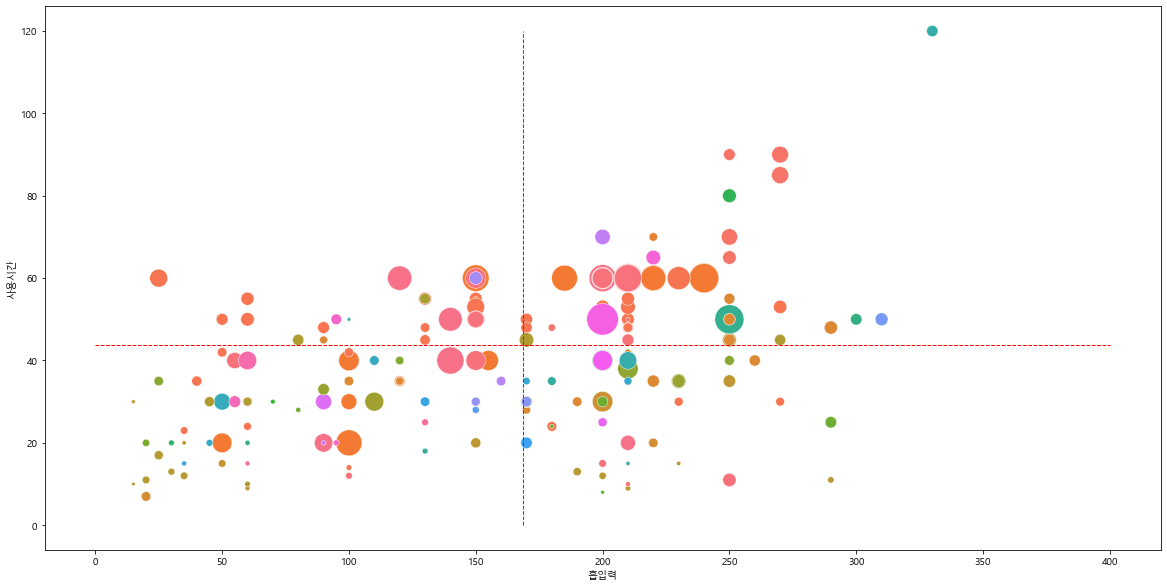

In [246]:
# 4분면 시각화
plt.figure(figsize = (20, 10))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = danawa_data['회사명'],
               data = danawa_data, legend = False,
               sizes = (10, 1000))
plt.hlines(use_time_mean_value, 0, 400, color='red', 
           linestyle='dashed', linewidth=1)
plt.vlines(suction_mean_value, 0, 120, color='red', 
           linestyle='dashed', linewidth=1)
plt.show()

In [247]:
chart_data_selected = top_list[:20]
chart_data_selected

,카테고리,회사명,제품,가격,사용시간,흡입력
150,핸디/스틱청소기,리하스,LH20,184000,120,330
21,핸디/스틱청소기,샤오미,드리미 V12,282060,90,270
74,핸디/스틱청소기,샤오미,드리미 T30,399000,90,270
22,핸디/스틱청소기,샤오미,드리미 V11,194880,90,250
274,핸디/스틱청소기,샤오미,드리미 V12 프로,408270,85,270
125,핸디/스틱청소기,모온,오비큠 플러스,269000,80,250
123,핸디/스틱청소기,샤오미,드리미 T20,379000,70,250
13,핸디/스틱청소기,델로라,V11 파워 300W,104990,70,220
244,핸디/스틱청소기,에이스전자,에이스 K7,337470,70,200
105,핸디/스틱청소기,샤오미,G10,256950,65,250


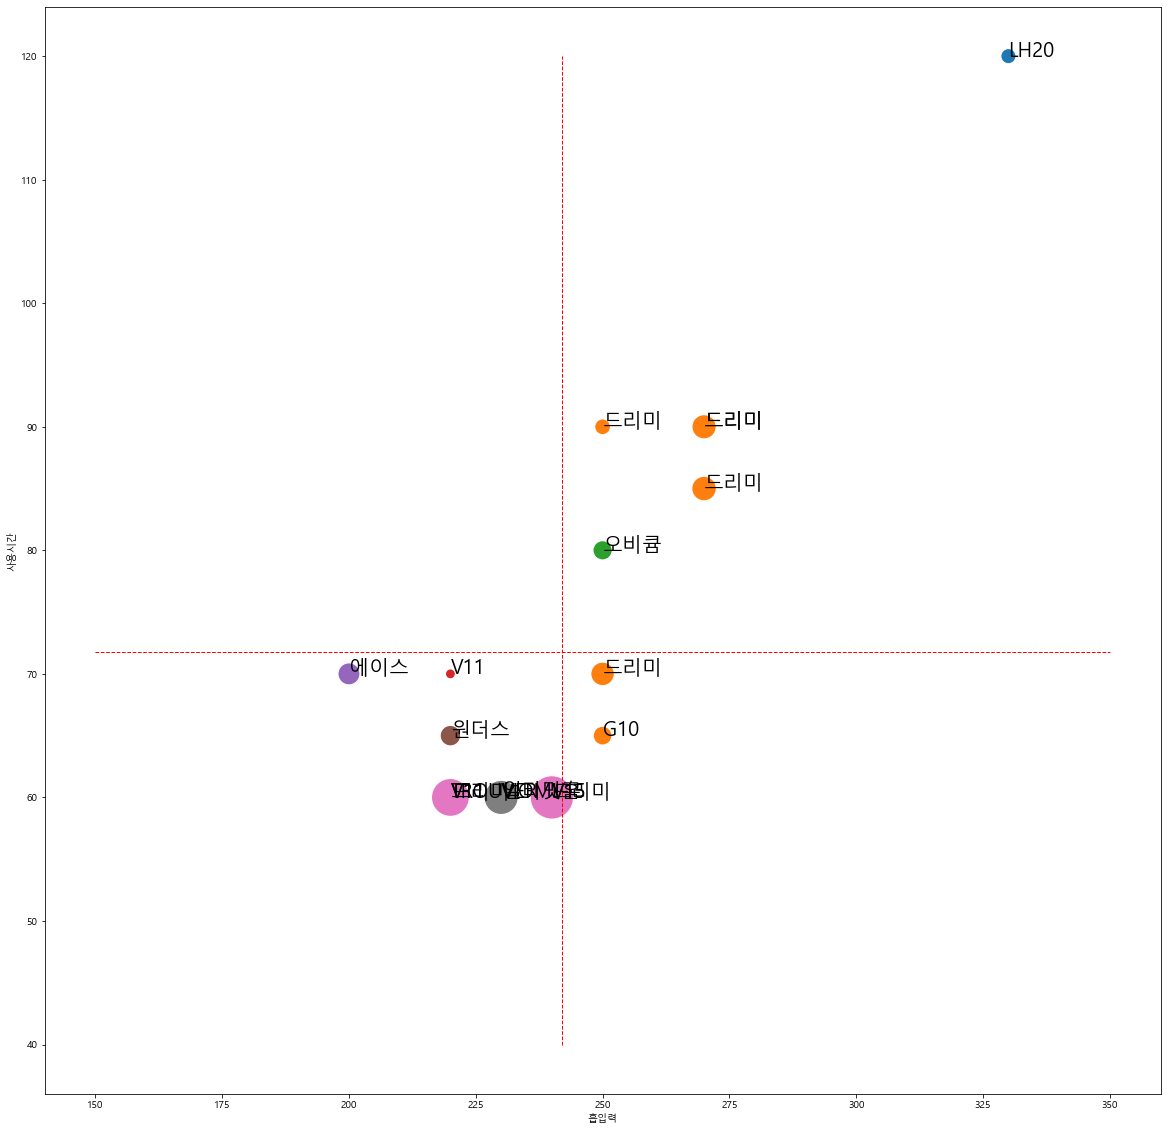

In [249]:
# top 20 제품 사분면 시각화

# suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
# use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

plt.figure(figsize = (20, 20))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = chart_data_selected['회사명'],
               data = chart_data_selected, legend = False,
               sizes = (100, 2000))
plt.hlines(use_time_mean_value, 150, 350, color='red', 
           linestyle='dashed', linewidth=1)
plt.vlines(suction_mean_value, 40, 120, color='red', 
           linestyle='dashed', linewidth=1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
    
    
plt.show()
